In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/My Drive/전력사용량.csv', encoding='cp949')

#column 이름 바꾸기 
col_name = ['건물번호', '날짜', '전력사용량', '기온', '풍속','습도' ,'강우량', '일조', '비전기냉방설비운영', '태양광보유']
train.columns = col_name
train

,건물번호,날짜,전력사용량,기온,풍속,습도,강우량,일조,비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
#column 이름 확인
train.columns

Index(['건물번호', '날짜', '전력사용량', '기온', '풍속', '습도', '강우량', '일조', '비전기냉방설비운영',
       '태양광보유'],
      dtype='object')

In [ ]:
#시간 변수 추가 
import datetime
format = '%Y-%m-%d %H'

year_list = [] 
month_list = [] 
day_list = [] 
hour_list = [] 
sec_list = [] 

for i in range(len(train)):
  str_datetime = train.날짜[i]
  dt_datetime = datetime.datetime.strptime(str_datetime,format)
  year_list.append(dt_datetime.year)
  month_list.append(dt_datetime.month)
  day_list.append(dt_datetime.day)
  hour_list.append(dt_datetime.hour)
  sec_list.append(dt_datetime.timestamp())

#train['연도'] = year_list
#train['월'] = month_list
#train['일'] = day_list
train['시간'] = hour_list
#train['초'] = sec_list

In [ ]:
train

,건물번호,날짜,전력사용량,기온,풍속,습도,강우량,일조,비전기냉방설비운영,태양광보유,시간
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22


In [ ]:
#건물번호 
#df = train
df = train[train.건물번호 == 60]

In [ ]:
df.loc[:,['날짜','전력사용량','기온', '풍속', '습도', '강우량', '일조', '시간']]

,날짜,전력사용량,기온,풍속,습도,강우량,일조,시간
120360,2020-06-01 00,2528.496,17.1,2.6,94.0,0.1,0.0,0
120361,2020-06-01 01,2243.808,17.0,5.7,94.0,0.0,0.0,1
120362,2020-06-01 02,2284.848,16.4,5.4,95.0,0.0,0.0,2
120363,2020-06-01 03,2248.992,16.4,3.9,96.0,0.0,0.0,3
120364,2020-06-01 04,2377.728,16.3,5.3,96.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...
122395,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,19
122396,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,20
122397,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,21
122398,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,22


In [ ]:
df_x = df.loc[:,['전력사용량','기온', '풍속', '습도', '강우량', '일조', '시간']]
df_y = df.loc[:,['전력사용량']]

#전처리
window_size = 24       
target_size = 1 

data_list = []
target_list = []

for i in range(len(df_x) - window_size - target_size):
  data_list.append(np.array(df_x[i : i + window_size]))
  target_list.append(np.array(df_y[i + window_size : i + window_size + target_size]))

data_ar = np.array(data_list)
data_ar = np.reshape(data_ar, (data_ar.shape[0], data_ar.shape[1]*data_ar.shape[2]))

target_ar = np.array(target_list)
target_ar = np.reshape(target_ar, (target_ar.shape[0], target_ar.shape[1]))

df_x = data_ar
df_y = target_ar

print(np.shape(df_x), np.shape(df_y))

(2015, 168) (2015, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
#데이터 분할 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, shuffle=False)

In [ ]:
# train set, test set 분할 후 shape 
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (1612, 168) y_train: (1612, 1)
x_test: (403, 168) y_test: (403, 1)


In [ ]:
#모델 생성
model=XGBRegressor()

#최적화할 파라미터 범위 
xgb_param = { 
        'n_estimators':[50,150,200,300],
        'learning_rate': [0.05,0.1,0.2,0.3],
        'max_depth': [3, 5, 7, 10]}

grid_xgb = GridSearchCV(model, param_grid=xgb_param, cv=2)
grid_xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=30, verbose=False)

[16:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=2, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 150, 200, 300]})

In [ ]:
#최적 파라미터 결과값 
grid_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
import sklearn.metrics as metrics 

#loss 측정 함수 
def rmse(y_true, y_pred): 
  mse=metrics.mean_squared_error(y_true, y_pred) 
  
  print('RMSE: ', round(np.sqrt(mse),4))

#최적 파라미터 결과값 
print(grid_xgb.best_params_)

print('------------------------------------------------------------------------')
print('train_loss')
y_true = y_train
y_pred = grid_xgb.predict(x_train)
rmse(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = y_test
y_pred = grid_xgb.predict(x_test)
rmse(y_true, y_pred)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
------------------------------------------------------------------------
train_loss
RMSE:  75.2179
------------------------------------------------------------------------
test_loss
RMSE:  178.024


In [ ]:
#test set 적합 후 예측 
predictions = grid_xgb.predict(x_test)
valid = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


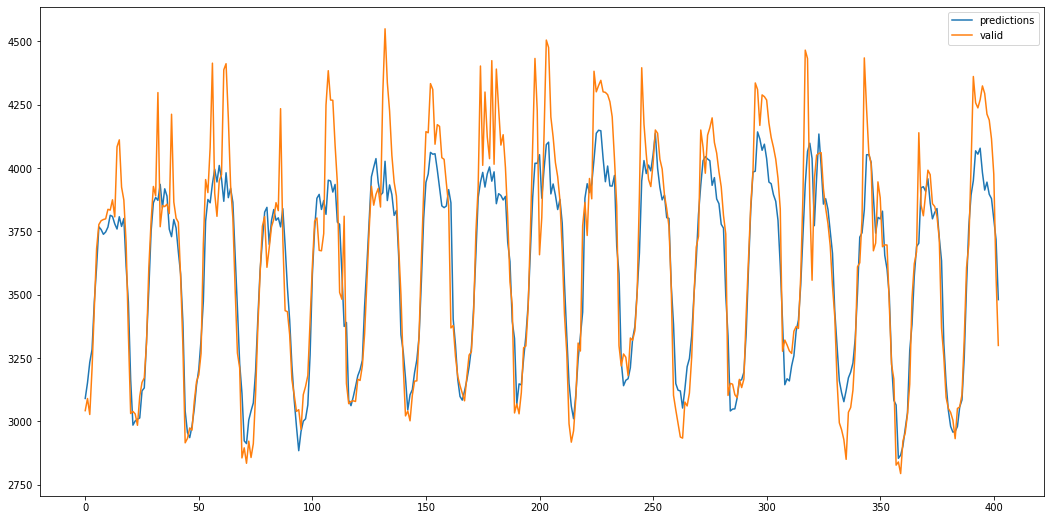

In [ ]:
#시각화
plt.figure(figsize=(18,9))
plt.plot(predictions)
plt.plot(valid)

plt.legend(['predictions', 'valid'], loc = 'low')